# Field inference

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammainc
import seaborn as sns

In [2]:
from scipy.signal import argrelextrema, find_peaks

In [3]:
sns.set_theme(context='paper', font= 'Serif', style = 'ticks')

In [4]:
a = 9.5
g = 10
d = 0.1
alpha = 10

time_step = 0.01
total_time = 50

time_arr = np.arange(0,total_time,time_step)

In [5]:
a_bar = a/(2*np.pi)
g_bar = g/(2*np.pi)

In [6]:
def set_initial_states(initial_value, initial_time_period, field_arr):
    initial_step = int(initial_time_period//time_step)
    field_arr[0:initial_step] = initial_value
    return field_arr

def field_avg_over_tau(field_arr, t, tau):
    steps = int(tau//time_step)
    ind = int(t//time_step)
    return np.average(field_arr[ind-steps:ind])

In [7]:
# epsilon = 0.00
tau = 1 / alpha
e_0 = a_bar/(1 + g_bar)

initial_e = e_0 + 0.01
epsilon = initial_e - e_0

field_arr = np.zeros_like(time_arr)

reset_time = 0 #last moment when e touched the ground

$$ E(t) = \bar{a} -  \bar{g}  \int_0^{\tau} E(t-d -s) ds /\tau $$

In [8]:
for ind,t in enumerate(time_arr):
    if t < 2*max(d,tau):
        field_arr[ind] = initial_e
        continue
    field_arr[ind] = a_bar - g_bar * field_avg_over_tau(field_arr, t - d, tau)

In [9]:
field_arr

array([5.93423932e-01, 5.93423932e-01, 5.93423932e-01, ...,
       1.06247868e+38, 9.23135440e+37, 9.23135440e+37])

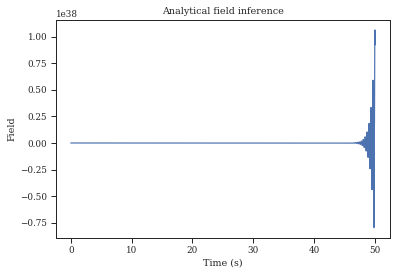

In [10]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Analytical field inference')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Field')

ax.plot(time_arr, field_arr)

# Phase diagram

In [11]:
def roof_func(array, roof):
    array[array>roof] = roof
    return array

In [12]:
time_step = 0.01
total_time = 30

time_arr = np.arange(0.01,total_time,time_step)

In [13]:
tau

0.1

In [14]:
g_arr = np.arange(0.1,15.1,0.5)
delay_arr = np.arange(0.01,1,0.05)

sigma_arr = np.zeros((g_arr.shape[0], delay_arr.shape[0]))
mean_arr = np.zeros((g_arr.shape[0], delay_arr.shape[0]))
check_arr = np.zeros((g_arr.shape[0], delay_arr.shape[0]), dtype = bool)
diff_arr = np.zeros((g_arr.shape[0], delay_arr.shape[0]))

In [15]:
for i,g in enumerate(g_arr):
    for j,d in enumerate(delay_arr):
        field_arr = np.zeros_like(time_arr)
        e_0 = a/(2*np.pi + g)
        g_bar = g/(2*np.pi)

        initial_e = e_0 + 0.1
        epsilon = initial_e - e_0
        
        for ind,t in enumerate(time_arr):
            if t < 2*max(d,tau):
                field_arr[ind] = initial_e
                continue
            field_arr[ind] = a_bar - g_bar * field_avg_over_tau(field_arr, t - d, tau)
        
        
        last_ind = int(2*d//time_step)
        sigma_arr[i,j] = np.std(field_arr[-last_ind:])
        mean_arr[i,j] = np.mean(field_arr[-last_ind:])
        
        indexes = np.unique(field_arr, return_index=True)[1]
        field_arr_unique = np.array( [field_arr[index] for index in sorted(indexes)] )
        local_peaks =  argrelextrema(field_arr_unique, np.greater)[0]
        if len(local_peaks) in [0,1]:
            check_arr[i,j] = False
        elif field_arr_unique[ local_peaks[-1] ]  > field_arr_unique[ local_peaks[-2] ]:
            check_arr[i,j] = True



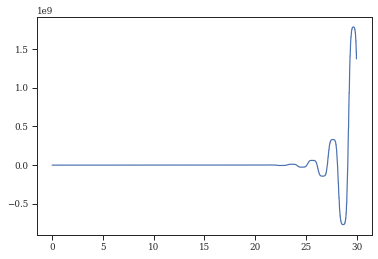

In [16]:
plt.plot(time_arr, field_arr)

In [17]:
argrelextrema(field_arr, np.greater)[0]
# sns.heatmap(roof_func(sigma_arr.T,10), xticklabels=g_arr, yticklabels=delay_arr[::-1])

array([1353, 1557, 1758, 2364, 2565, 2766], dtype=int64)

<AxesSubplot:>

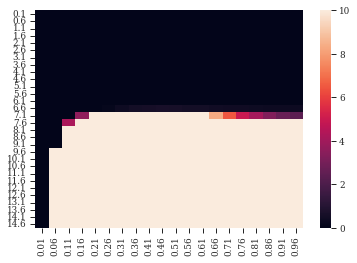

In [18]:
sns.heatmap(roof_func(sigma_arr,10), xticklabels=np.round(delay_arr,2), yticklabels=np.round(g_arr,2))

In [19]:
# sns.heatmap(check_arr,xticklabels=np.round(delay_arr,2), yticklabels=np.round(g_arr,2))